In [530]:

#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import precision_score


In [531]:
df = pd.read_csv('/Users/aimaldastagirzada/Downloads/archive (7)/RAW_recipes.csv')



In [532]:
df

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [533]:
df.dtypes

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

In [534]:
df.head(1)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7


In [535]:
df['nutrition'] = df['nutrition'].str.replace(r'[\[\]]', '', regex=True)


In [536]:
df[['Calories', 'Total_fat', 'Sugar', 'Sodium', 'Protein', 'Saturated_fat', 'Carbs']] = df['nutrition'].str.split(',', expand=True).astype(float)


In [537]:
df.head(1)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0


In [538]:
df.drop(columns='nutrition', inplace=True)


In [539]:
df

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0


In [540]:
thresholds = {
    'Calories': 560,
    'Total_fat': 20,
    'Sugar': 10,
    'Sodium': 600,
    'Protein': 15,
    'Saturated_fat': 6,
    'Carbs': 80
}

In [541]:
# Function to classify as healthy or unhealthy
def classify(row):
    is_healthy = all(row[key] < threshold for key, threshold in thresholds.items())
    return 1 if is_healthy else 0

In [542]:
# Apply classification to the dataset
df['is_healthy'] = df.apply(classify, axis=1)

In [543]:
df

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0,0
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0,1
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0,1
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0,0


In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            231636 non-null  object 
 1   id              231637 non-null  int64  
 2   minutes         231637 non-null  int64  
 3   contributor_id  231637 non-null  int64  
 4   submitted       231637 non-null  object 
 5   tags            231637 non-null  object 
 6   n_steps         231637 non-null  int64  
 7   steps           231637 non-null  object 
 8   description     226658 non-null  object 
 9   ingredients     231637 non-null  object 
 10  n_ingredients   231637 non-null  int64  
 11  Calories        231637 non-null  float64
 12  Total_fat       231637 non-null  float64
 13  Sugar           231637 non-null  float64
 14  Sodium          231637 non-null  float64
 15  Protein         231637 non-null  float64
 16  Saturated_fat   231637 non-null  float64
 17  Carbs     

In [545]:
df.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000,231637.000000,231637.00000,231637.000000,231637.000000,231637.00000,231637.000000,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153,473.942425,36.08070,84.296865,30.147485,34.68186,45.589150,15.560403,0.051408
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796,1189.711374,77.79884,800.080897,131.961589,58.47248,98.235758,81.824560,0.220829
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000,174.400000,8.00000,9.000000,5.000000,7.00000,7.000000,4.000000,0.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000,313.400000,20.00000,25.000000,14.000000,18.00000,23.000000,9.000000,0.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000,519.700000,41.00000,68.000000,33.000000,51.00000,52.000000,16.000000,0.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000,434360.200000,17183.00000,362729.000000,29338.000000,6552.00000,10395.000000,36098.000000,1.000000


In [546]:
df.drop(columns='id', inplace=True)

In [547]:
df

,name,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
0,arriba baked winter squash mexican style,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0
1,a bit different breakfast pizza,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,0
2,all in the kitchen chili,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,0
3,alouette potatoes,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,0
4,amish tomato ketchup for canning,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0,0
231633,zydeco spice mix,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0,1
231634,zydeco ya ya deviled eggs,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0,1
231635,cookies by design cookies on a stick,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0,0


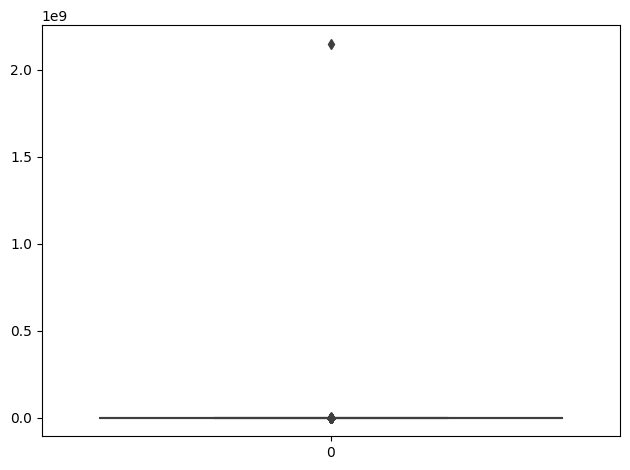

In [548]:

sns.boxplot(df['minutes'])

plt.tight_layout()

In [549]:
df['minutes'].describe(include='all')

count    2.316370e+05
mean     9.398546e+03
std      4.461963e+06
min      0.000000e+00
25%      2.000000e+01
50%      4.000000e+01
75%      6.500000e+01
max      2.147484e+09
Name: minutes, dtype: float64

In [550]:
df=df[df['minutes']<100000]

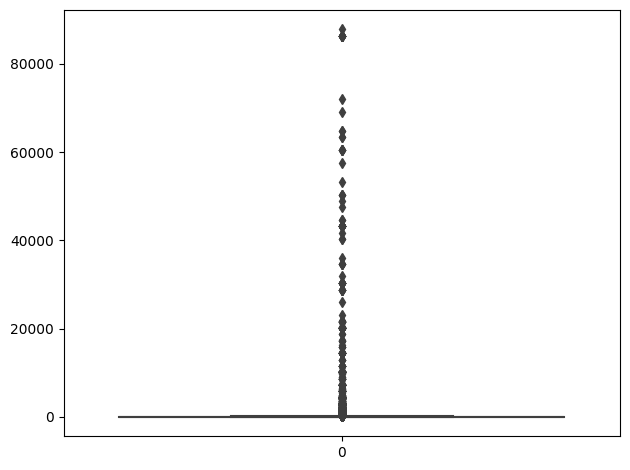

In [551]:
sns.boxplot(df['minutes'])

plt.tight_layout()

In [552]:
df=df[df['minutes']<80000]

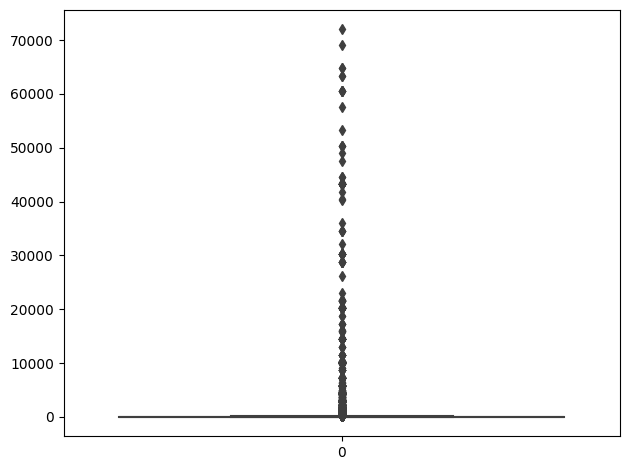

In [553]:
sns.boxplot(df['minutes'])

plt.tight_layout()

In [554]:
df['minutes'].describe(include='all')

count    231601.000000
mean        103.346644
std         891.924358
min           0.000000
25%          20.000000
50%          40.000000
75%          65.000000
max       72000.000000
Name: minutes, dtype: float64

In [555]:
df=df[df['minutes']<1000]

In [556]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229396 entries, 0 to 231636
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            229395 non-null  object 
 1   minutes         229396 non-null  int64  
 2   contributor_id  229396 non-null  int64  
 3   submitted       229396 non-null  object 
 4   tags            229396 non-null  object 
 5   n_steps         229396 non-null  int64  
 6   steps           229396 non-null  object 
 7   description     224450 non-null  object 
 8   ingredients     229396 non-null  object 
 9   n_ingredients   229396 non-null  int64  
 10  Calories        229396 non-null  float64
 11  Total_fat       229396 non-null  float64
 12  Sugar           229396 non-null  float64
 13  Sodium          229396 non-null  float64
 14  Protein         229396 non-null  float64
 15  Saturated_fat   229396 non-null  float64
 16  Carbs           229396 non-null  float64
 17  is_healthy     

In [557]:
df['minutes'].describe(include='all')


count    229396.000000
mean         63.434380
std          92.213224
min           0.000000
25%          20.000000
50%          40.000000
75%          65.000000
max         990.000000
Name: minutes, dtype: float64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

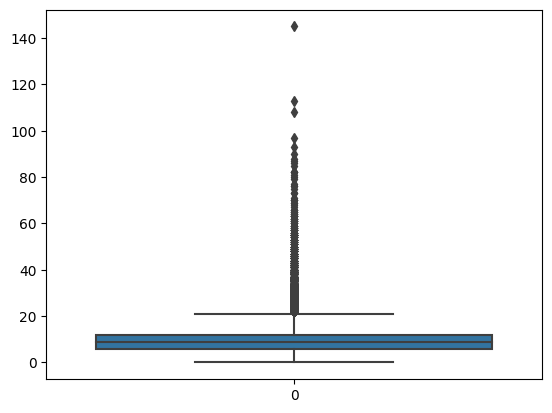

In [558]:
sns.boxplot(df['n_steps'])
plt.tight_layout

In [559]:
df = df[df['n_steps']< 100]

In [560]:
df['n_steps'].describe()

count    229393.000000
mean          9.734717
std           5.927370
min           0.000000
25%           6.000000
50%           9.000000
75%          12.000000
max          97.000000
Name: n_steps, dtype: float64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

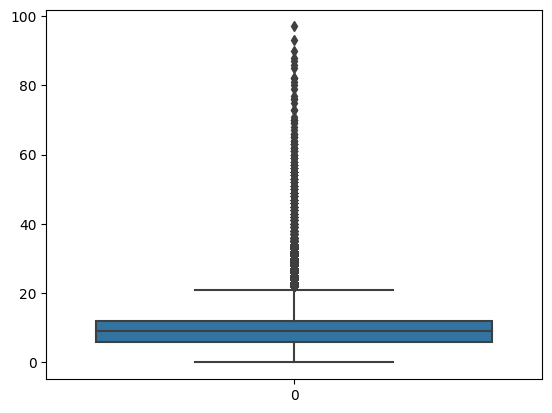

In [561]:
sns.boxplot(df['n_steps'])
plt.tight_layout

In [562]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229393 entries, 0 to 231636
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            229392 non-null  object 
 1   minutes         229393 non-null  int64  
 2   contributor_id  229393 non-null  int64  
 3   submitted       229393 non-null  object 
 4   tags            229393 non-null  object 
 5   n_steps         229393 non-null  int64  
 6   steps           229393 non-null  object 
 7   description     224447 non-null  object 
 8   ingredients     229393 non-null  object 
 9   n_ingredients   229393 non-null  int64  
 10  Calories        229393 non-null  float64
 11  Total_fat       229393 non-null  float64
 12  Sugar           229393 non-null  float64
 13  Sodium          229393 non-null  float64
 14  Protein         229393 non-null  float64
 15  Saturated_fat   229393 non-null  float64
 16  Carbs           229393 non-null  float64
 17  is_healthy     

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

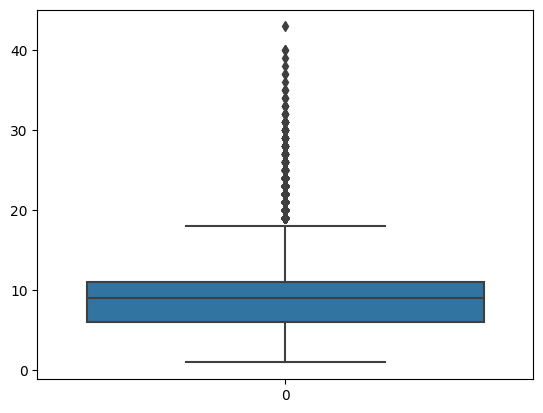

In [563]:
sns.boxplot(df['n_ingredients'])
plt.tight_layout

In [564]:
df= df[df['n_ingredients']<40]

In [565]:
df['n_ingredients'].describe()

count    229390.000000
mean          9.051354
std           3.726335
min           1.000000
25%           6.000000
50%           9.000000
75%          11.000000
max          39.000000
Name: n_ingredients, dtype: float64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

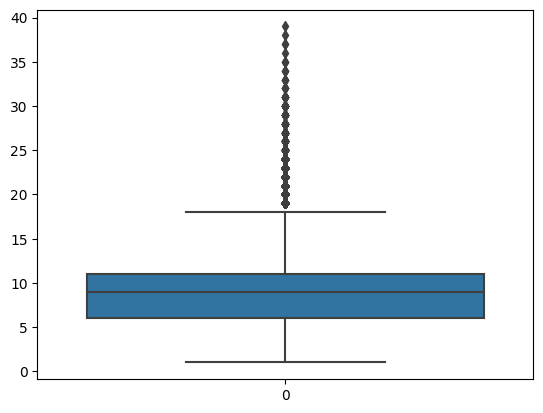

In [566]:
sns.boxplot(df['n_ingredients'])
plt.tight_layout

In [567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229390 entries, 0 to 231636
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            229389 non-null  object 
 1   minutes         229390 non-null  int64  
 2   contributor_id  229390 non-null  int64  
 3   submitted       229390 non-null  object 
 4   tags            229390 non-null  object 
 5   n_steps         229390 non-null  int64  
 6   steps           229390 non-null  object 
 7   description     224444 non-null  object 
 8   ingredients     229390 non-null  object 
 9   n_ingredients   229390 non-null  int64  
 10  Calories        229390 non-null  float64
 11  Total_fat       229390 non-null  float64
 12  Sugar           229390 non-null  float64
 13  Sodium          229390 non-null  float64
 14  Protein         229390 non-null  float64
 15  Saturated_fat   229390 non-null  float64
 16  Carbs           229390 non-null  float64
 17  is_healthy     

In [568]:
df.drop(columns='name' , inplace=True)

In [569]:
df

,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
0,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0
1,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,0
2,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,0
3,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,0
4,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0,0
231633,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0,1
231634,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0,1
231635,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0,0


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

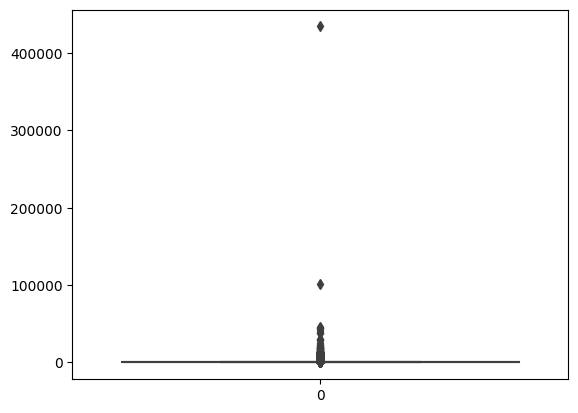

In [570]:
sns.boxplot(df['Calories'])
plt.tight_layout

In [571]:
df['Calories'].describe()

count    229390.000000
mean        471.110829
std        1184.871505
min           0.000000
25%         174.300000
50%         312.900000
75%         518.100000
max      434360.200000
Name: Calories, dtype: float64

In [572]:
df[df['Calories']>100000]

,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
70467,100,485396,2007-05-11,"['time-to-make', 'course', 'main-ingredient', ...",12,['the night before you plan to serve your prim...,this makes the juicest and best flavored prime...,"['boneless rib-eye roast', 'peanut oil', 'grou...",6,101614.7,17183.0,0.0,230.0,1271.0,10395.0,1.0,0
209453,20,374913,2006-11-01,"['30-minutes-or-less', 'time-to-make', 'course...",3,['to boiled cornmeal add yeast and lots of sug...,common moonshine recipe in tennessee,"['cornmeal', 'natural bran', 'sugar', 'yeast',...",5,434360.2,1293.0,362729.0,1324.0,3961.0,590.0,36098.0,0


In [573]:
df=df[df['Calories'] < 100000]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

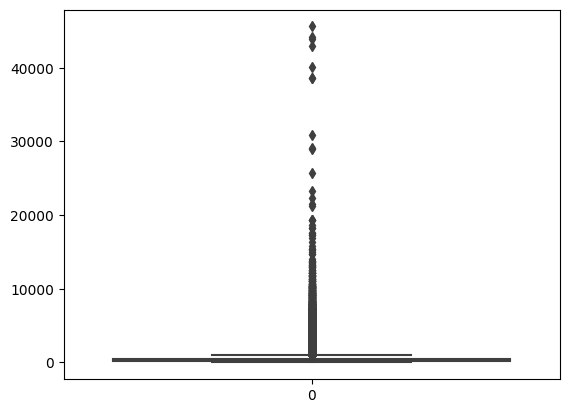

In [574]:
sns.boxplot(df['Calories'])
plt.tight_layout

In [575]:
df=df[df['Calories'] < 3500]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

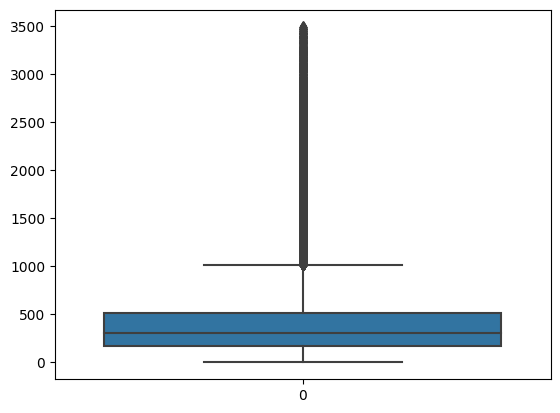

In [576]:
sns.boxplot(df['Calories'])
plt.tight_layout

In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227116 entries, 0 to 231636
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   minutes         227116 non-null  int64  
 1   contributor_id  227116 non-null  int64  
 2   submitted       227116 non-null  object 
 3   tags            227116 non-null  object 
 4   n_steps         227116 non-null  int64  
 5   steps           227116 non-null  object 
 6   description     222286 non-null  object 
 7   ingredients     227116 non-null  object 
 8   n_ingredients   227116 non-null  int64  
 9   Calories        227116 non-null  float64
 10  Total_fat       227116 non-null  float64
 11  Sugar           227116 non-null  float64
 12  Sodium          227116 non-null  float64
 13  Protein         227116 non-null  float64
 14  Saturated_fat   227116 non-null  float64
 15  Carbs           227116 non-null  float64
 16  is_healthy      227116 non-null  int64  
dtypes: float64(7), 

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

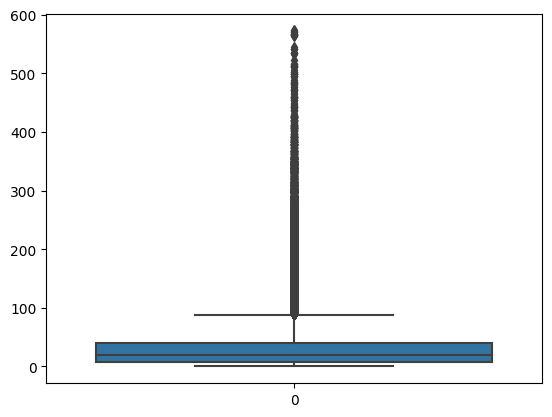

In [578]:
sns.boxplot(df['Total_fat'])
plt.tight_layout

In [579]:
df=df[df['Total_fat'] < 550]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

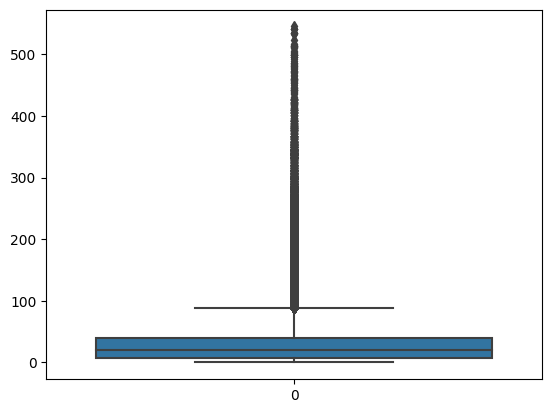

In [580]:
sns.boxplot(df['Total_fat'])
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

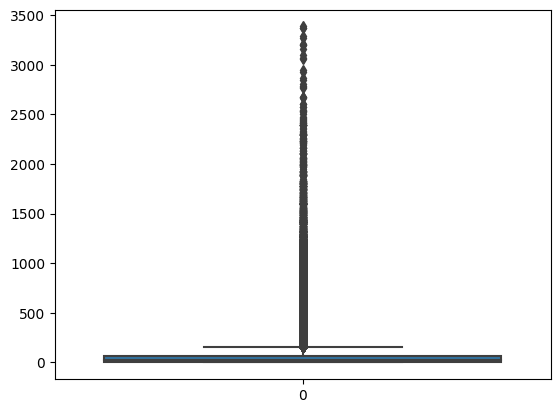

In [581]:
sns.boxplot(df['Sugar'])
plt.tight_layout

In [582]:
df=df[df['Sugar'] < 3000]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

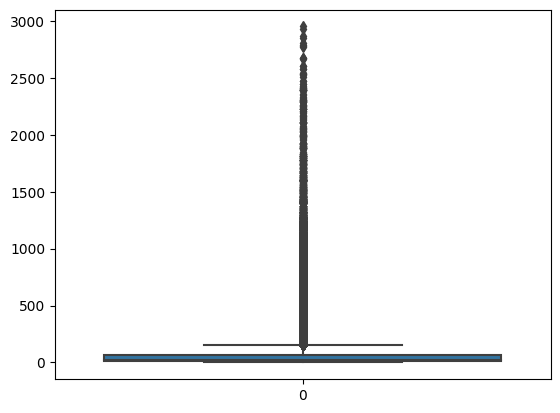

In [583]:
sns.boxplot(df['Sugar'])
plt.tight_layout

In [636]:
sugar_outlier=[df['Sugar'] < 1500]

In [638]:
sugar_outlier[sugar_outlier].count()

TypeError: list indices must be integers or slices, not list

In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227092 entries, 0 to 231636
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   minutes         227092 non-null  int64  
 1   contributor_id  227092 non-null  int64  
 2   submitted       227092 non-null  object 
 3   tags            227092 non-null  object 
 4   n_steps         227092 non-null  int64  
 5   steps           227092 non-null  object 
 6   description     222262 non-null  object 
 7   ingredients     227092 non-null  object 
 8   n_ingredients   227092 non-null  int64  
 9   Calories        227092 non-null  float64
 10  Total_fat       227092 non-null  float64
 11  Sugar           227092 non-null  float64
 12  Sodium          227092 non-null  float64
 13  Protein         227092 non-null  float64
 14  Saturated_fat   227092 non-null  float64
 15  Carbs           227092 non-null  float64
 16  is_healthy      227092 non-null  int64  
dtypes: float64(7), 

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

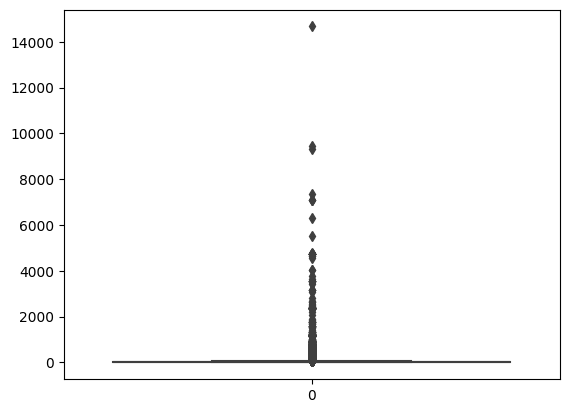

In [585]:
sns.boxplot(df['Sodium'])
plt.tight_layout

In [586]:
df=df[df['Sodium']<800]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

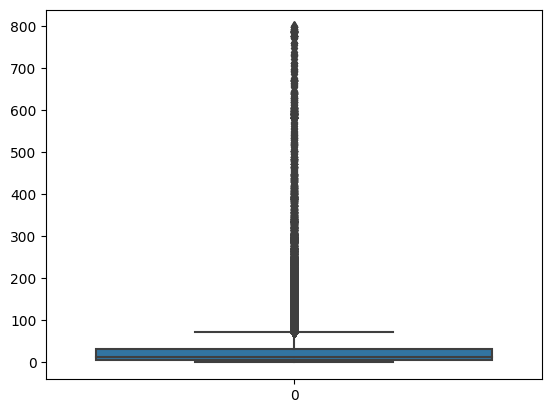

In [587]:
sns.boxplot(df['Sodium'])
plt.tight_layout

In [588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226830 entries, 0 to 231636
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   minutes         226830 non-null  int64  
 1   contributor_id  226830 non-null  int64  
 2   submitted       226830 non-null  object 
 3   tags            226830 non-null  object 
 4   n_steps         226830 non-null  int64  
 5   steps           226830 non-null  object 
 6   description     222010 non-null  object 
 7   ingredients     226830 non-null  object 
 8   n_ingredients   226830 non-null  int64  
 9   Calories        226830 non-null  float64
 10  Total_fat       226830 non-null  float64
 11  Sugar           226830 non-null  float64
 12  Sodium          226830 non-null  float64
 13  Protein         226830 non-null  float64
 14  Saturated_fat   226830 non-null  float64
 15  Carbs           226830 non-null  float64
 16  is_healthy      226830 non-null  int64  
dtypes: float64(7), 

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

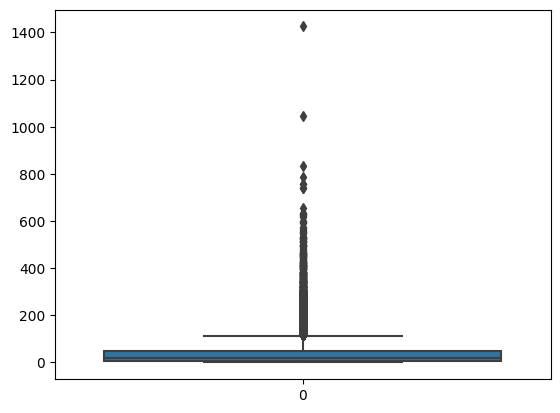

In [589]:
sns.boxplot(df['Protein'])
plt.tight_layout

In [590]:
df=df[df['Protein']<200]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

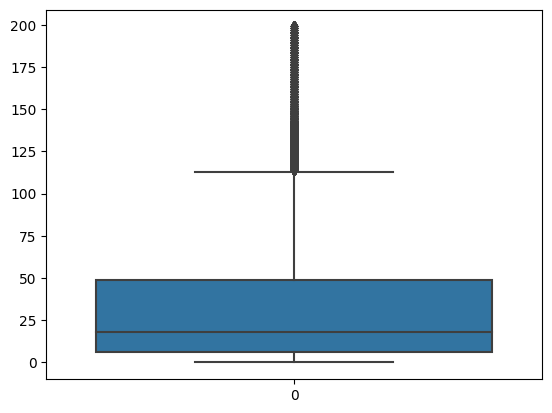

In [591]:
sns.boxplot(df['Protein'])
plt.tight_layout

In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225566 entries, 0 to 231636
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   minutes         225566 non-null  int64  
 1   contributor_id  225566 non-null  int64  
 2   submitted       225566 non-null  object 
 3   tags            225566 non-null  object 
 4   n_steps         225566 non-null  int64  
 5   steps           225566 non-null  object 
 6   description     220789 non-null  object 
 7   ingredients     225566 non-null  object 
 8   n_ingredients   225566 non-null  int64  
 9   Calories        225566 non-null  float64
 10  Total_fat       225566 non-null  float64
 11  Sugar           225566 non-null  float64
 12  Sodium          225566 non-null  float64
 13  Protein         225566 non-null  float64
 14  Saturated_fat   225566 non-null  float64
 15  Carbs           225566 non-null  float64
 16  is_healthy      225566 non-null  int64  
dtypes: float64(7), 

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

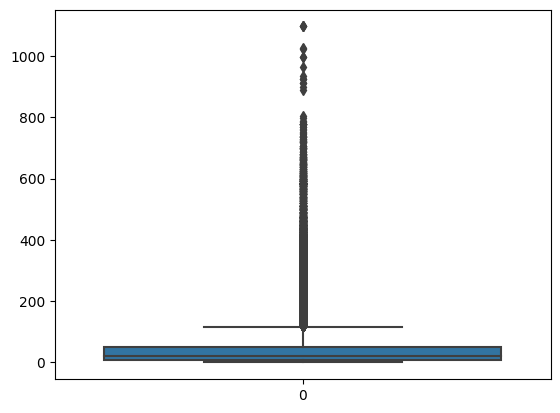

In [593]:
sns.boxplot(df['Saturated_fat'])
plt.tight_layout

In [594]:
df=df[df['Saturated_fat']<600]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

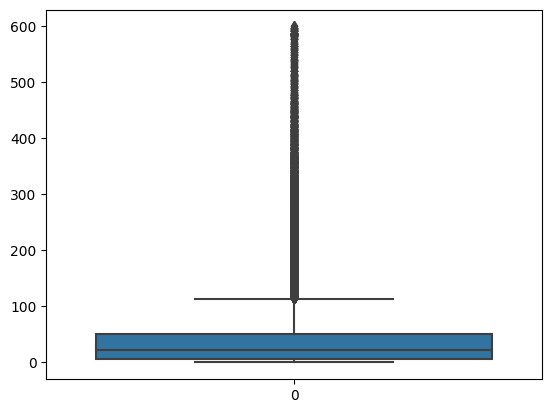

In [595]:
sns.boxplot(df['Saturated_fat'])
plt.tight_layout


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

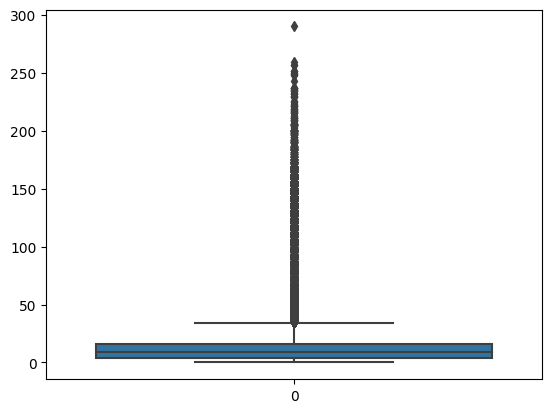

In [596]:
sns.boxplot(df['Carbs'])
plt.tight_layout

In [597]:
df=df[df['Carbs']<200]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

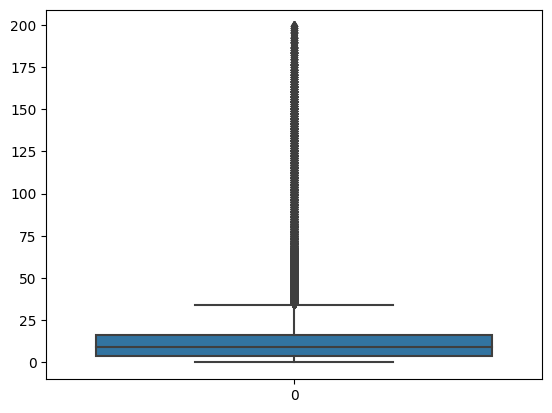

In [598]:
sns.boxplot(df['Carbs'])
plt.tight_layout

In [599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225317 entries, 0 to 231636
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   minutes         225317 non-null  int64  
 1   contributor_id  225317 non-null  int64  
 2   submitted       225317 non-null  object 
 3   tags            225317 non-null  object 
 4   n_steps         225317 non-null  int64  
 5   steps           225317 non-null  object 
 6   description     220551 non-null  object 
 7   ingredients     225317 non-null  object 
 8   n_ingredients   225317 non-null  int64  
 9   Calories        225317 non-null  float64
 10  Total_fat       225317 non-null  float64
 11  Sugar           225317 non-null  float64
 12  Sodium          225317 non-null  float64
 13  Protein         225317 non-null  float64
 14  Saturated_fat   225317 non-null  float64
 15  Carbs           225317 non-null  float64
 16  is_healthy      225317 non-null  int64  
dtypes: float64(7), 

In [600]:
df.describe(include='all')

,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
count,225317.000000,2.253170e+05,225317,225317,225317.000000,225317,220551,225317,225317.000000,225317.000000,225317.000000,225317.000000,225317.000000,225317.000000,225317.000000,225317.000000,225317.000000
unique,NaN,NaN,5076,203387,NaN,224774,216685,224207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2000-03-06,"['15-minutes-or-less', 'time-to-make', 'course...",NaN,['blend all ingredients until smooth'],yum,"['eggs', 'water']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,455,397,NaN,19,148,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,62.874226,5.475158e+06,NaN,NaN,9.695052,NaN,NaN,NaN,9.038124,405.721038,30.648877,64.781579,24.702899,31.281421,38.484331,13.035581,0.052144
std,91.644227,9.916000e+07,NaN,NaN,5.876449,NaN,NaN,NaN,3.718638,389.536406,38.044706,135.926175,38.407344,33.511769,52.734057,17.851742,0.222318
min,0.000000,2.700000e+01,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,5.704200e+04,NaN,NaN,6.000000,NaN,NaN,NaN,6.000000,172.200000,8.000000,9.000000,5.000000,6.000000,7.000000,4.000000,0.000000
50%,37.000000,1.764810e+05,NaN,NaN,9.000000,NaN,NaN,NaN,9.000000,307.700000,20.000000,24.000000,14.000000,18.000000,22.000000,9.000000,0.000000
75%,65.000000,4.013360e+05,NaN,NaN,12.000000,NaN,NaN,NaN,11.000000,503.700000,39.000000,65.000000,31.000000,49.000000,50.000000,16.000000,0.000000


In [601]:
df2=df.copy()

In [602]:
df2

,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
0,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0
1,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,0
2,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,0
3,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,0
4,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0,0
231633,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0,1
231634,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0,1
231635,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0,0


In [603]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225317 entries, 0 to 231636
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   minutes         225317 non-null  int64  
 1   contributor_id  225317 non-null  int64  
 2   submitted       225317 non-null  object 
 3   tags            225317 non-null  object 
 4   n_steps         225317 non-null  int64  
 5   steps           225317 non-null  object 
 6   description     220551 non-null  object 
 7   ingredients     225317 non-null  object 
 8   n_ingredients   225317 non-null  int64  
 9   Calories        225317 non-null  float64
 10  Total_fat       225317 non-null  float64
 11  Sugar           225317 non-null  float64
 12  Sodium          225317 non-null  float64
 13  Protein         225317 non-null  float64
 14  Saturated_fat   225317 non-null  float64
 15  Carbs           225317 non-null  float64
 16  is_healthy      225317 non-null  int64  
dtypes: float64(7), 

In [604]:
df2=df2[df2['minutes']<150]

In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225317 entries, 0 to 231636
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   minutes         225317 non-null  int64  
 1   contributor_id  225317 non-null  int64  
 2   submitted       225317 non-null  object 
 3   tags            225317 non-null  object 
 4   n_steps         225317 non-null  int64  
 5   steps           225317 non-null  object 
 6   description     220551 non-null  object 
 7   ingredients     225317 non-null  object 
 8   n_ingredients   225317 non-null  int64  
 9   Calories        225317 non-null  float64
 10  Total_fat       225317 non-null  float64
 11  Sugar           225317 non-null  float64
 12  Sodium          225317 non-null  float64
 13  Protein         225317 non-null  float64
 14  Saturated_fat   225317 non-null  float64
 15  Carbs           225317 non-null  float64
 16  is_healthy      225317 non-null  int64  
dtypes: float64(7), 

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

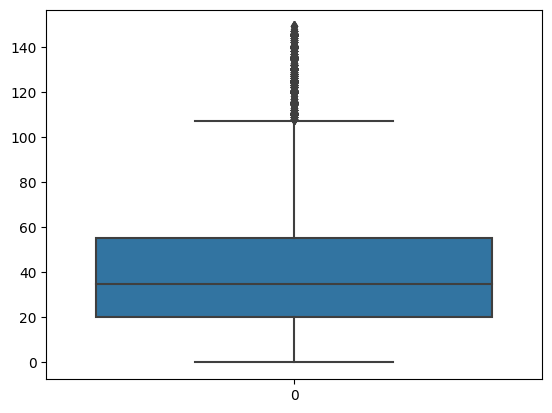

In [606]:
sns.boxplot(df2['minutes'])
plt.tight_layout

In [607]:
df2.describe(include='all' )

,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
count,207538.000000,2.075380e+05,207538,207538,207538.000000,207538,203116,207538,207538.000000,207538.000000,207538.000000,207538.000000,207538.000000,207538.000000,207538.000000,207538.000000,207538.000000
unique,NaN,NaN,5026,186879,NaN,207020,199588,206528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2000-03-06,"['15-minutes-or-less', 'time-to-make', 'course...",NaN,['blend all ingredients until smooth'],yum,"['eggs', 'water']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,424,397,NaN,19,136,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.925084,5.241682e+06,NaN,NaN,9.559093,NaN,NaN,NaN,8.949633,397.421639,30.149982,64.560408,23.830841,29.873777,37.861433,12.844722,0.053036
std,29.200282,9.681689e+07,NaN,NaN,5.665036,NaN,NaN,NaN,3.658599,382.171296,37.546582,136.673150,37.121924,32.132940,51.984313,17.379798,0.224106
min,0.000000,2.700000e+01,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,5.733800e+04,NaN,NaN,6.000000,NaN,NaN,NaN,6.000000,169.100000,8.000000,9.000000,5.000000,6.000000,7.000000,4.000000,0.000000
50%,35.000000,1.774430e+05,NaN,NaN,8.000000,NaN,NaN,NaN,9.000000,302.100000,20.000000,24.000000,14.000000,17.000000,22.000000,9.000000,0.000000
75%,55.000000,4.070580e+05,NaN,NaN,12.000000,NaN,NaN,NaN,11.000000,493.800000,39.000000,64.000000,30.000000,47.000000,50.000000,16.000000,0.000000


In [608]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207538 entries, 0 to 231636
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   minutes         207538 non-null  int64  
 1   contributor_id  207538 non-null  int64  
 2   submitted       207538 non-null  object 
 3   tags            207538 non-null  object 
 4   n_steps         207538 non-null  int64  
 5   steps           207538 non-null  object 
 6   description     203116 non-null  object 
 7   ingredients     207538 non-null  object 
 8   n_ingredients   207538 non-null  int64  
 9   Calories        207538 non-null  float64
 10  Total_fat       207538 non-null  float64
 11  Sugar           207538 non-null  float64
 12  Sodium          207538 non-null  float64
 13  Protein         207538 non-null  float64
 14  Saturated_fat   207538 non-null  float64
 15  Carbs           207538 non-null  float64
 16  is_healthy      207538 non-null  int64  
dtypes: float64(7), 

**Start from removing some more outliers and make feature enigeer of n-steps and incgredients**

In [609]:
df2.head(1)

,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
0,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0


In [610]:
df2.drop(columns='contributor_id', inplace=True)

/var/folders/yk/m3w26_h527n36v88wgw18khc0000gn/T/ipykernel_66458/4199295015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns='contributor_id', inplace=True)


In [611]:
df2.head(1)

,minutes,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
0,55,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0


In [612]:
df2['description']

0         autumn is my favorite time of year to cook! th...
1         this recipe calls for the crust to be prebaked...
2         this modified version of 'mom's' chili was a h...
3         this is a super easy, great tasting, make ahea...
5                                                       NaN
                                ...                        
231632    this is a delicious soup that i originally fou...
231633      this spice mix will make your taste buds dance!
231634                            deviled eggs, cajun-style
231635    i've heard of the 'cookies by design' company,...
231636    i've heard of the 'cookies by design' company,...
Name: description, Length: 207538, dtype: object

In [613]:
Fat_grouped = df2.groupby(['is_healthy' , 'Calories'] )



In [614]:
df2

,minutes,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
0,55,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0
1,30,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,0
2,130,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,0
3,45,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,0
5,0,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4,160.2,10.0,55.0,3.0,9.0,20.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,60,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,415.2,26.0,34.0,26.0,44.0,21.0,15.0,0
231633,5,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,1.0,1
231634,40,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.0,1
231635,29,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10,188.0,11.0,57.0,11.0,7.0,21.0,9.0,0


<Axes: xlabel='is_healthy'>

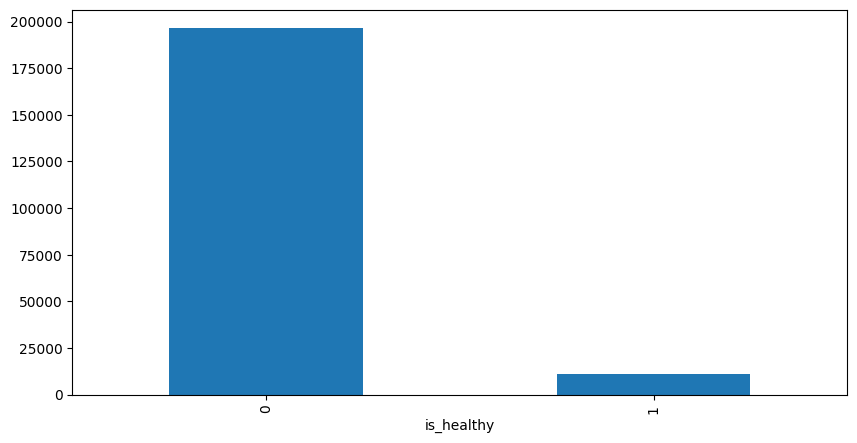

In [615]:
df2.groupby('is_healthy')['Calories'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='is_healthy'>

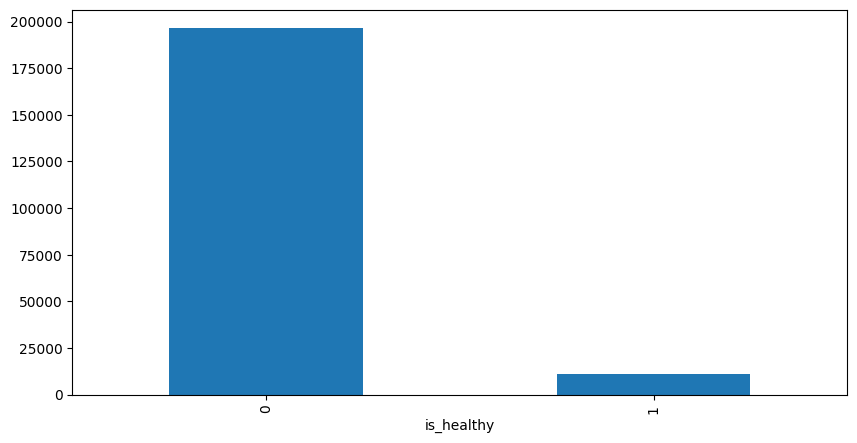

In [616]:
df2.groupby('is_healthy') ['Total_fat'].count(). sort_values (ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='is_healthy'>

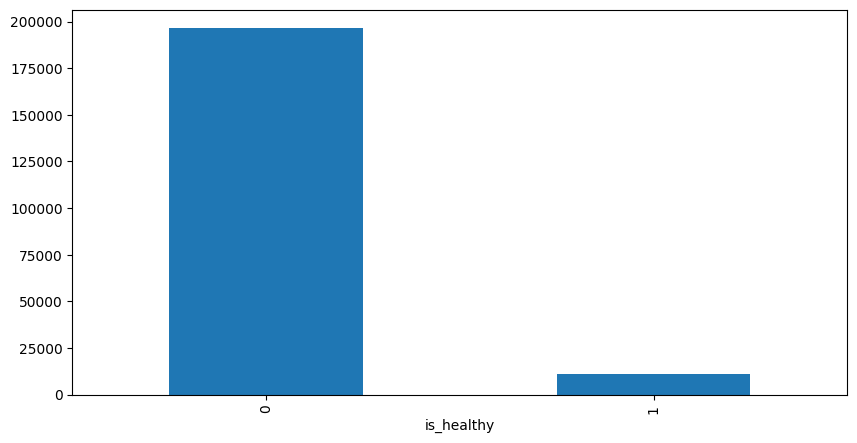

In [617]:
df2.groupby('is_healthy') ['Protein'].count(). sort_values (ascending=False).plot(kind='bar', figsize=(10,5))

In [618]:
df2.drop(columns='tags', inplace=True)

/var/folders/yk/m3w26_h527n36v88wgw18khc0000gn/T/ipykernel_66458/3480045758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns='tags', inplace=True)


In [619]:
df2.drop(columns='steps', inplace=True) 

/var/folders/yk/m3w26_h527n36v88wgw18khc0000gn/T/ipykernel_66458/1085502612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns='steps', inplace=True)


In [620]:
df2.drop(columns='description', inplace=True)

/var/folders/yk/m3w26_h527n36v88wgw18khc0000gn/T/ipykernel_66458/3582997014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns='description', inplace=True)


In [621]:
df2.drop(columns='ingredients', inplace=True)

/var/folders/yk/m3w26_h527n36v88wgw18khc0000gn/T/ipykernel_66458/1300265535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns='ingredients', inplace=True)


In [622]:
df2

,minutes,submitted,n_steps,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy
0,55,2005-09-16,11,7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0
1,30,2002-06-17,9,6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,0
2,130,2005-02-25,6,13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,0
3,45,2003-04-14,11,11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,0
5,0,1999-12-06,4,4,160.2,10.0,55.0,3.0,9.0,20.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,60,2012-08-29,7,22,415.2,26.0,34.0,26.0,44.0,21.0,15.0,0
231633,5,2013-01-09,1,13,14.8,0.0,2.0,58.0,1.0,0.0,1.0,1
231634,40,2008-06-07,7,8,59.2,6.0,2.0,3.0,6.0,5.0,0.0,1
231635,29,2008-04-15,9,10,188.0,11.0,57.0,11.0,7.0,21.0,9.0,0


In [623]:
df2['submitted'] = pd.to_datetime(df2['submitted'])


/var/folders/yk/m3w26_h527n36v88wgw18khc0000gn/T/ipykernel_66458/748768571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['submitted'] = pd.to_datetime(df2['submitted'])


In [624]:
df2['Year'] = df2['submitted'].dt.year
df2['Month'] = df2['submitted'].dt.month
df2['Day'] = df2['submitted'].dt.day

/var/folders/yk/m3w26_h527n36v88wgw18khc0000gn/T/ipykernel_66458/680512941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = df2['submitted'].dt.year
/var/folders/yk/m3w26_h527n36v88wgw18khc0000gn/T/ipykernel_66458/680512941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = df2['submitted'].dt.month
/var/folders/yk/m3w26_h527n36v88wgw18khc0000gn/T/ipykernel_66458/680512941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [625]:
df2

,minutes,submitted,n_steps,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy,Year,Month,Day
0,55,2005-09-16,11,7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0,2005,9,16
1,30,2002-06-17,9,6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,0,2002,6,17
2,130,2005-02-25,6,13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,0,2005,2,25
3,45,2003-04-14,11,11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,0,2003,4,14
5,0,1999-12-06,4,4,160.2,10.0,55.0,3.0,9.0,20.0,7.0,0,1999,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,60,2012-08-29,7,22,415.2,26.0,34.0,26.0,44.0,21.0,15.0,0,2012,8,29
231633,5,2013-01-09,1,13,14.8,0.0,2.0,58.0,1.0,0.0,1.0,1,2013,1,9
231634,40,2008-06-07,7,8,59.2,6.0,2.0,3.0,6.0,5.0,0.0,1,2008,6,7
231635,29,2008-04-15,9,10,188.0,11.0,57.0,11.0,7.0,21.0,9.0,0,2008,4,15


In [626]:
df2.drop(columns='submitted', inplace= True)

/var/folders/yk/m3w26_h527n36v88wgw18khc0000gn/T/ipykernel_66458/1066512879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns='submitted', inplace= True)


In [627]:
df2

,minutes,n_steps,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,is_healthy,Year,Month,Day
0,55,11,7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0,2005,9,16
1,30,9,6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,0,2002,6,17
2,130,6,13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,0,2005,2,25
3,45,11,11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,0,2003,4,14
5,0,4,4,160.2,10.0,55.0,3.0,9.0,20.0,7.0,0,1999,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,60,7,22,415.2,26.0,34.0,26.0,44.0,21.0,15.0,0,2012,8,29
231633,5,1,13,14.8,0.0,2.0,58.0,1.0,0.0,1.0,1,2013,1,9
231634,40,7,8,59.2,6.0,2.0,3.0,6.0,5.0,0.0,1,2008,6,7
231635,29,9,10,188.0,11.0,57.0,11.0,7.0,21.0,9.0,0,2008,4,15


In [628]:
df2['Day'].unique()

array([16, 17, 25, 14,  6, 30,  4, 10, 29, 27, 28,  8, 13,  5, 19,  9,  3,
       11, 15, 26, 20, 22, 23, 18,  2, 12,  1,  7, 24, 21, 31],
      dtype=int32)

<Axes: xlabel='is_healthy', ylabel='Day'>

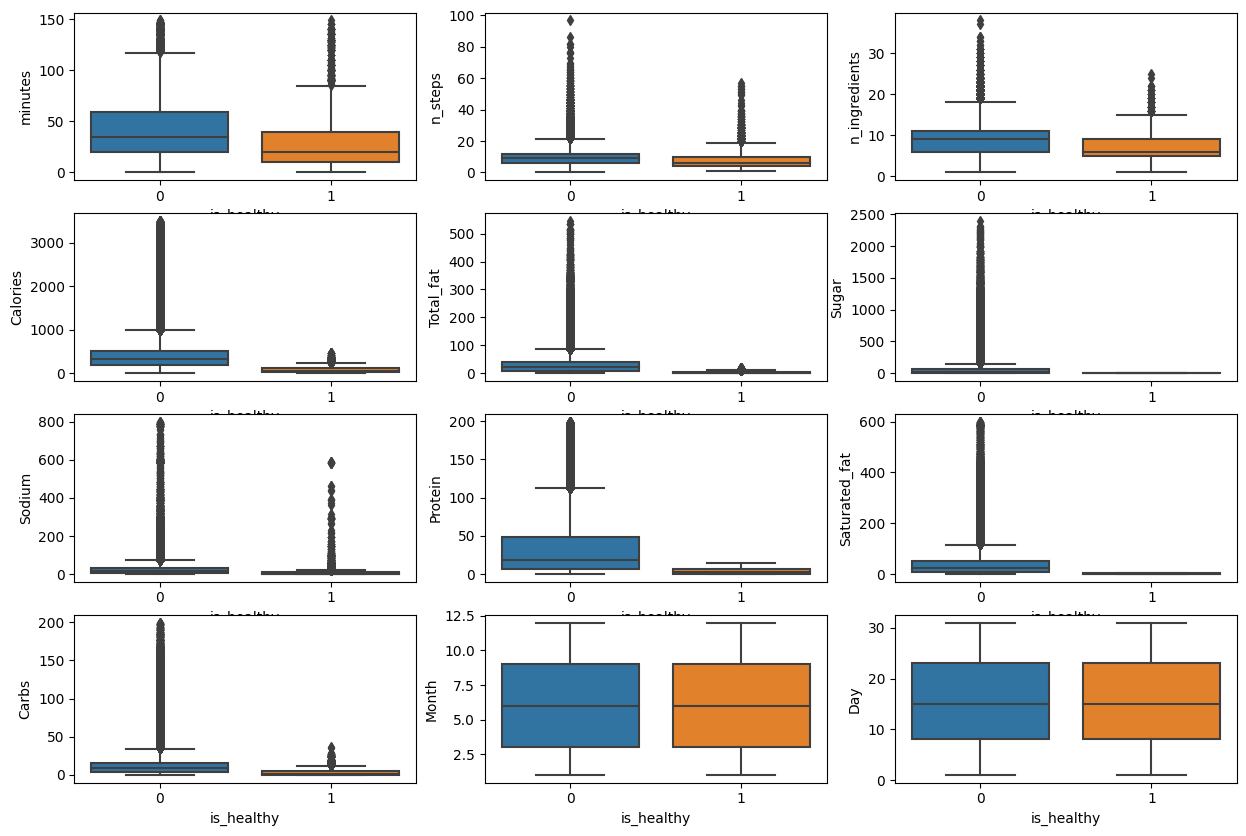

In [629]:
fig, axs = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(x='is_healthy', y='minutes', data=df2, ax=axs[0][0])
sns.boxplot(x='is_healthy', y='n_steps', data=df2, ax=axs[0][1])
sns.boxplot(x='is_healthy', y='n_ingredients', data=df2, ax=axs[0][2])
sns.boxplot(x='is_healthy', y='Calories', data=df2, ax=axs[1][0])
sns.boxplot(x='is_healthy', y='Total_fat', data=df2, ax=axs[1][1])
sns.boxplot(x='is_healthy', y='Sugar', data=df2, ax=axs[1][2])
sns.boxplot(x='is_healthy', y='Sodium', data=df2, ax=axs[2][0])
sns.boxplot(x='is_healthy', y='Protein', data=df2, ax=axs[2][1])
sns.boxplot(x='is_healthy', y='Saturated_fat', data=df2, ax=axs[2][2])
sns.boxplot(x='is_healthy', y='Carbs', data=df2, ax=axs[3][0])
sns.boxplot(x='is_healthy', y='Month', data=df2, ax=axs[3][1])
sns.boxplot(x='is_healthy', y='Day', data=df2, ax=axs[3][2])

<Axes: xlabel='Saturated_fat', ylabel='Count'>

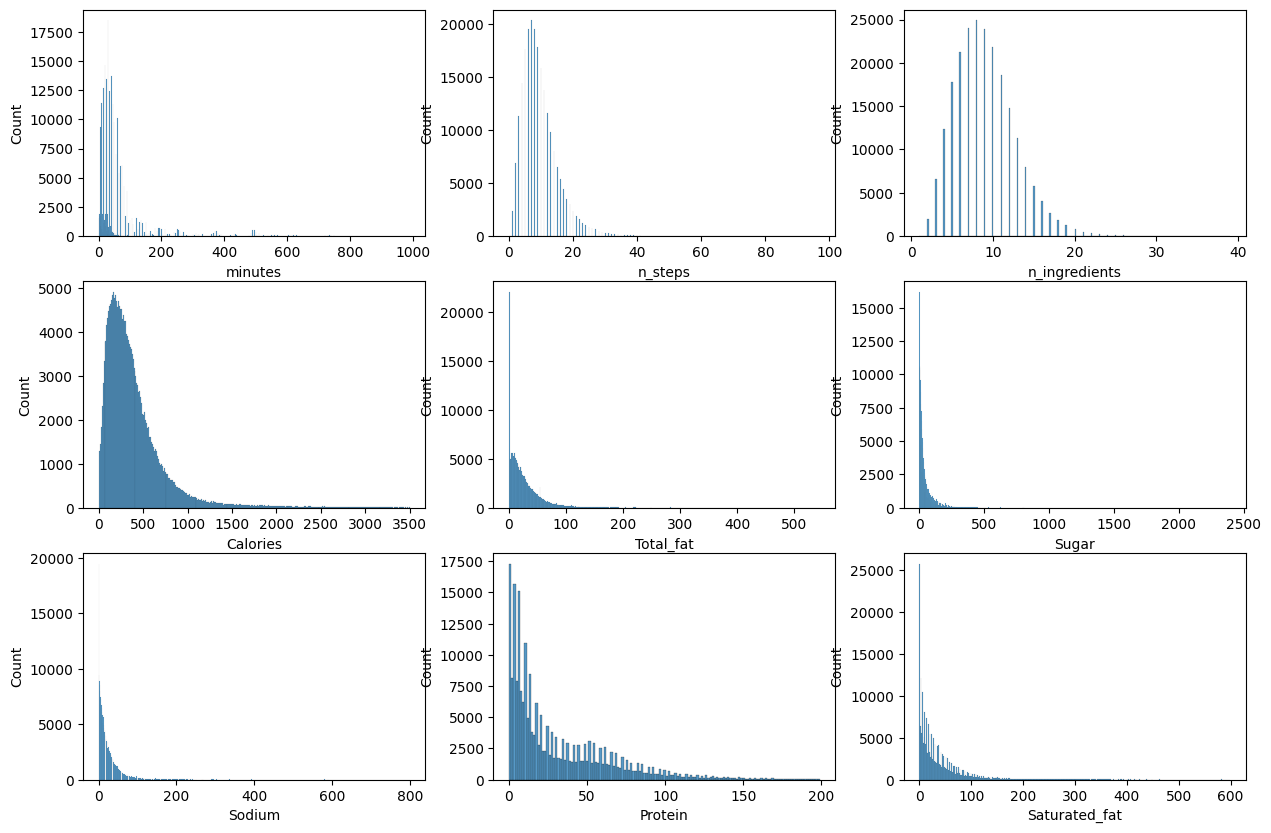

In [630]:
fig, axs = plt.subplots(3,3, figsize=(15,10))

sns.histplot(df['minutes'], ax =axs[0][0])
sns.histplot(df['n_steps'], ax=axs[0][1])
sns.histplot(df['n_ingredients'], ax=axs[0][2])
sns.histplot(df['Calories'],ax =axs[1][0])
sns.histplot(df['Total_fat'],ax=axs[1][1])
sns.histplot(df['Sugar'], ax =axs[1][2])
sns.histplot(df['Sodium'], ax =axs[2][0])
sns.histplot(df['Protein'], ax =axs[2][1])
sns.histplot(df['Saturated_fat'], ax =axs[2][2])

